### Importing necessary library 

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### loading dataset

In [5]:
data = pd.read_csv("application_data.csv")
description = pd.read_csv("columns_description.csv",sep=",", encoding='cp1252') # data is not encoded properly.
prev_app = pd.read_csv("previous_application.csv")

In [6]:
print(data.shape)
data.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(description.shape)
description.head()

(160, 5)


,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [8]:
print(prev_app.shape)
prev_app.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### data wrangling (processing and cleaning)

In [9]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [12]:
columns = tuple(data.columns)
print(columns)

('SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [13]:
# finding if large number of entries are missing in columns
#let's see percentage of data missing in application data.
null_dict = dict()
total_rows = data.shape[0]
print(total_rows)
for c in range(len(columns)):
    null_dict[data.columns[c]]= int(((data[data.columns[c]].isnull().sum())/total_rows)*100)
        

307511


In [14]:
null_dict

{'SK_ID_CURR': 0,
 'TARGET': 0,
 'NAME_CONTRACT_TYPE': 0,
 'CODE_GENDER': 0,
 'FLAG_OWN_CAR': 0,
 'FLAG_OWN_REALTY': 0,
 'CNT_CHILDREN': 0,
 'AMT_INCOME_TOTAL': 0,
 'AMT_CREDIT': 0,
 'AMT_ANNUITY': 0,
 'AMT_GOODS_PRICE': 0,
 'NAME_TYPE_SUITE': 0,
 'NAME_INCOME_TYPE': 0,
 'NAME_EDUCATION_TYPE': 0,
 'NAME_FAMILY_STATUS': 0,
 'NAME_HOUSING_TYPE': 0,
 'REGION_POPULATION_RELATIVE': 0,
 'DAYS_BIRTH': 0,
 'DAYS_EMPLOYED': 0,
 'DAYS_REGISTRATION': 0,
 'DAYS_ID_PUBLISH': 0,
 'OWN_CAR_AGE': 65,
 'FLAG_MOBIL': 0,
 'FLAG_EMP_PHONE': 0,
 'FLAG_WORK_PHONE': 0,
 'FLAG_CONT_MOBILE': 0,
 'FLAG_PHONE': 0,
 'FLAG_EMAIL': 0,
 'OCCUPATION_TYPE': 31,
 'CNT_FAM_MEMBERS': 0,
 'REGION_RATING_CLIENT': 0,
 'REGION_RATING_CLIENT_W_CITY': 0,
 'WEEKDAY_APPR_PROCESS_START': 0,
 'HOUR_APPR_PROCESS_START': 0,
 'REG_REGION_NOT_LIVE_REGION': 0,
 'REG_REGION_NOT_WORK_REGION': 0,
 'LIVE_REGION_NOT_WORK_REGION': 0,
 'REG_CITY_NOT_LIVE_CITY': 0,
 'REG_CITY_NOT_WORK_CITY': 0,
 'LIVE_CITY_NOT_WORK_CITY': 0,
 'ORGANIZATION_TYP

In [15]:
count = 0
miss_list = list() # columns >=40%
miss_list_lessthen_40 = list() # less then 40% but greater then 0
miss_list_0 = list()

for key in null_dict:
    if null_dict[key]>=40:
        miss_list.append(key)
        count+=1
    elif null_dict[key]<40 and null_dict[key]>0:
        miss_list_lessthen_40.append(key)
    else:
        miss_list_0.append(key)
        
print(count)
print(miss_list)

49
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_M

In [16]:
# there are 49 columns which have more then 40% data missing so we can drop those columns from application(data)
data.drop(miss_list,axis=1,inplace=True)
data.shape

(307511, 73)

In [17]:
# now we are remaining with 73 columns
# let's see columns which has missing value <40% and >0%
print(len(miss_list_lessthen_40))
for key in miss_list_lessthen_40:
    print(key, null_dict[key])

8
OCCUPATION_TYPE 31
EXT_SOURCE_3 19
AMT_REQ_CREDIT_BUREAU_HOUR 13
AMT_REQ_CREDIT_BUREAU_DAY 13
AMT_REQ_CREDIT_BUREAU_WEEK 13
AMT_REQ_CREDIT_BUREAU_MON 13
AMT_REQ_CREDIT_BUREAU_QRT 13
AMT_REQ_CREDIT_BUREAU_YEAR 13


In [18]:
# there are 8 columns which have missing value <40% and >0%
# let's see which type of variable these are
for c in miss_list_lessthen_40:
    print(data[c].dtype)
    

object
float64
float64
float64
float64
float64
float64
float64


In [19]:
# one column is of type object (OCCUPATION_TYPE) catagriocal and rest numerical
# let's handle this frist 31% value are missing
data["OCCUPATION_TYPE"].value_counts() # these are sort of categroies

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
# Most of applicants are Laborers 
# if we try to fill Missing values with Laborers which are 31% these does not make sense
# filling with rest also does not 
# we can remove those rows where these values are missing but doing this means losing 31% of entire data(not advisible)
# SO finally for EDA we can ignore this and let it be null itself now.


In [21]:
# for numerical columns 13% in 6 columns and 19% in 1 columns have mssing values
#see some of them
data["EXT_SOURCE_3"].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [22]:
description[description["Row"]=="EXT_SOURCE_3"]["Description"]
# EXT_SOURCE_3 columns has info about(Normalized score from external data source)

43    Normalized score from external data source
Name: Description, dtype: object

<AxesSubplot:>

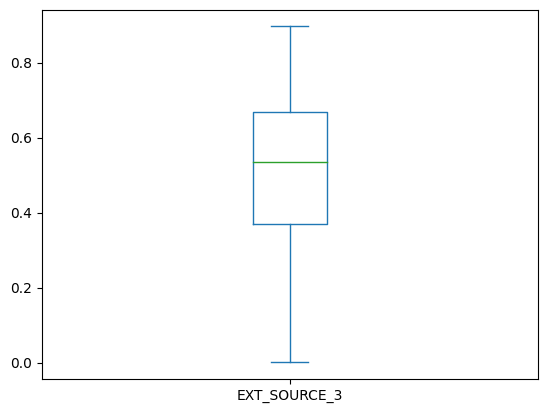

In [23]:
data["EXT_SOURCE_3"].plot.box()

In [24]:
# EDA here itself
print(data["EXT_SOURCE_3"].mode())
data["EXT_SOURCE_3"].describe() # mean is at .51, median at .53 mode = .74


0    0.7463
Name: EXT_SOURCE_3, dtype: float64


count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [25]:
#Mean-It is preferred if data is numeric and not skewed.
#Median-It is preferred if data is numeric and skewed.
#Mode-It is preferred if the data is a string(object) or numeric.

In [26]:
# we can go with mean here
data["EXT_SOURCE_3"].skew(axis = 0, skipna = True)
data["EXT_SOURCE_3"]=data["EXT_SOURCE_3"].fillna(data["EXT_SOURCE_3"].mean())
data["EXT_SOURCE_3"].isnull().sum()

0

<AxesSubplot:>

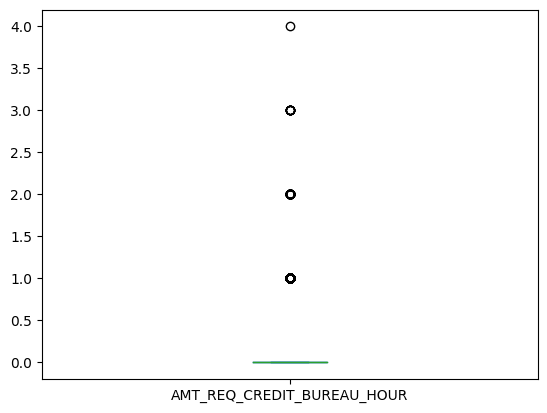

In [27]:
data["AMT_REQ_CREDIT_BUREAU_HOUR"].plot.box()

In [28]:
data["AMT_REQ_CREDIT_BUREAU_HOUR"].skew(axis = 0, skipna = True) # data is skewed for this column 
# we will fill with median

14.534062061826708

In [29]:
data["AMT_REQ_CREDIT_BUREAU_HOUR"]=data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(data["AMT_REQ_CREDIT_BUREAU_HOUR"].median())


In [30]:
# Similarly we can fill median for now for rest also
data["AMT_REQ_CREDIT_BUREAU_DAY"]=data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(data["AMT_REQ_CREDIT_BUREAU_DAY"].median())
data["AMT_REQ_CREDIT_BUREAU_WEEK"]=data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(data["AMT_REQ_CREDIT_BUREAU_WEEK"].median())
data["AMT_REQ_CREDIT_BUREAU_MON"]=data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(data["AMT_REQ_CREDIT_BUREAU_MON"].median())
data["AMT_REQ_CREDIT_BUREAU_QRT"]=data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(data["AMT_REQ_CREDIT_BUREAU_QRT"].median())
data["AMT_REQ_CREDIT_BUREAU_YEAR"]=data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(data["AMT_REQ_CREDIT_BUREAU_YEAR"].median())


In [31]:
data[miss_list_lessthen_40].info() # handled all missings.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OCCUPATION_TYPE             211120 non-null  object 
 1   EXT_SOURCE_3                307511 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_HOUR  307511 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_DAY   307511 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_WEEK  307511 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_MON   307511 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_QRT   307511 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_YEAR  307511 non-null  float64
dtypes: float64(7), object(1)
memory usage: 18.8+ MB


### EDA on Categeorical variables (UniVariate analysis)

In [32]:
#seperating catagriocal columns from dataset
num_column = list(data.select_dtypes(exclude='object').columns)
cat_column = list(data.select_dtypes(include='object').columns)
print(len(num_column))
print(len(cat_column))

61
12


In [33]:
# lets see some of them
cat_column

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [34]:
description[description["Row"]=='NAME_CONTRACT_TYPE'] #Identification if loan is cash or revolving

,Unnamed: 0,Table,Row,Description,Special
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
124,178,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",NaN


In [35]:
data["NAME_CONTRACT_TYPE"].value_counts() # only two categrioes (Cash Loans and Revolving Loans)


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:>

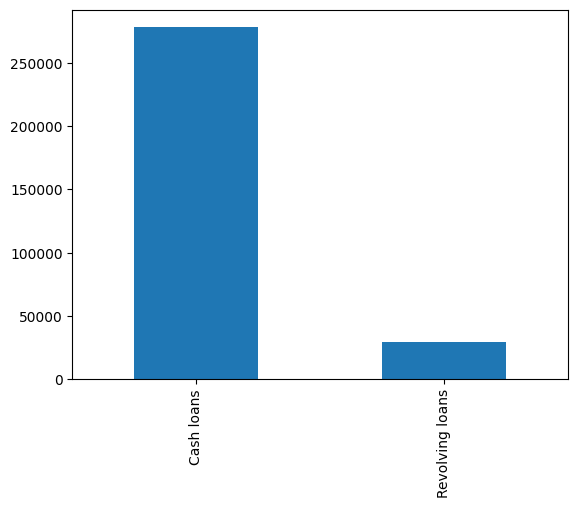

In [36]:
data["NAME_CONTRACT_TYPE"].value_counts().plot.bar() # we can see that large percestage of application for Cash loans here

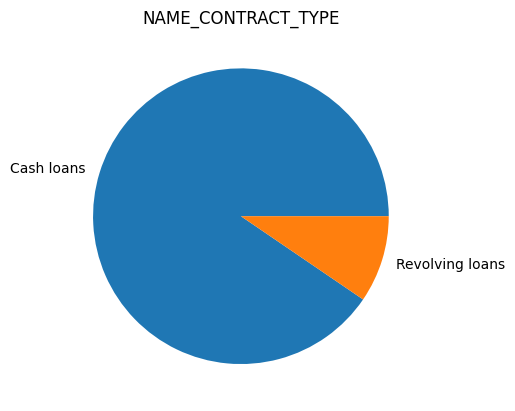

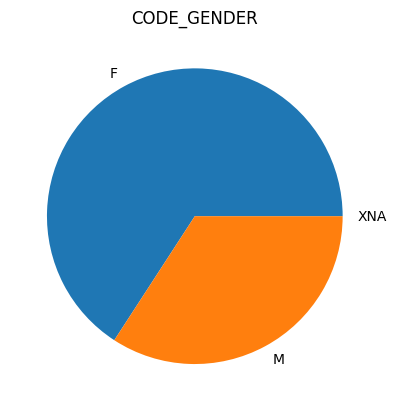

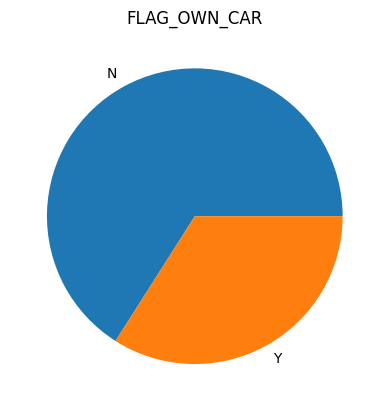

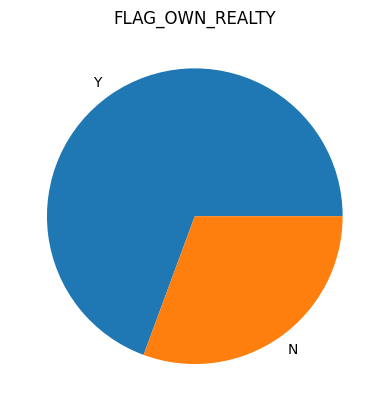

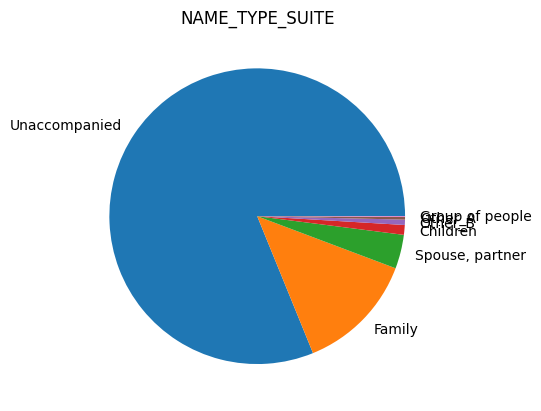

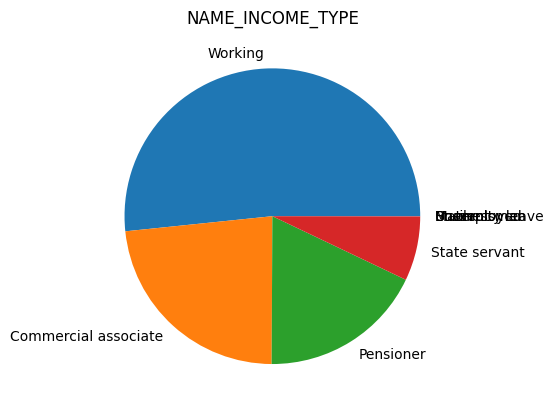

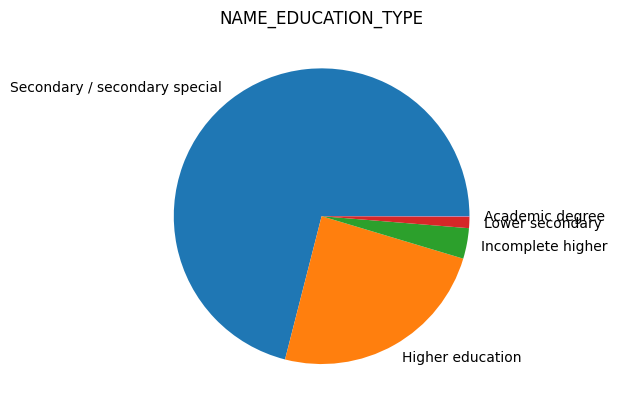

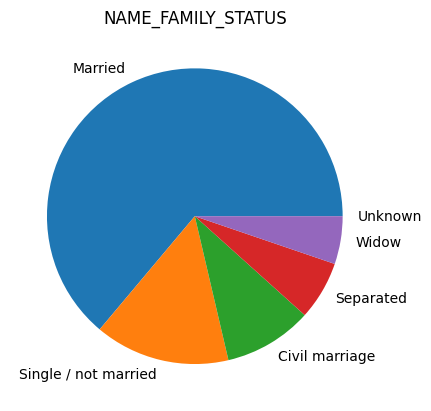

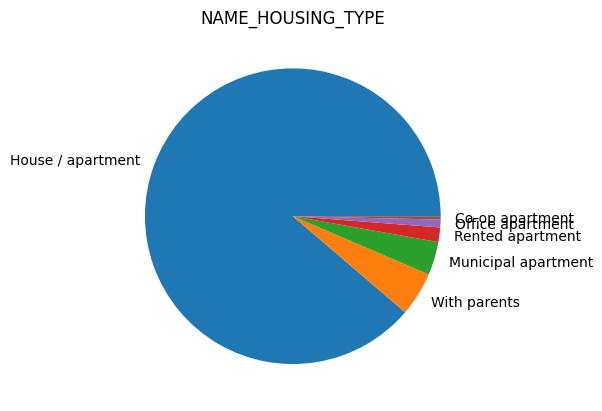

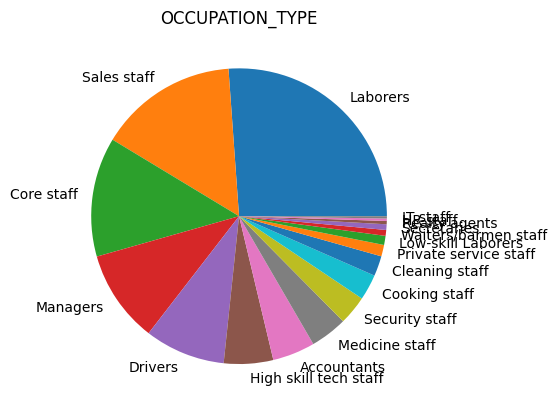

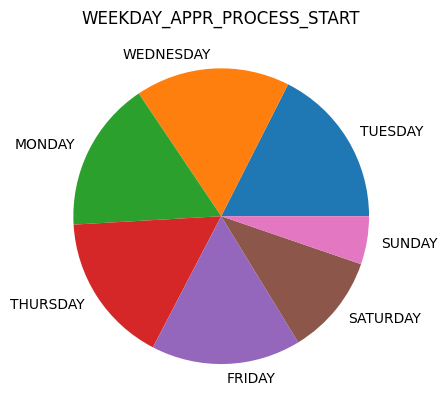

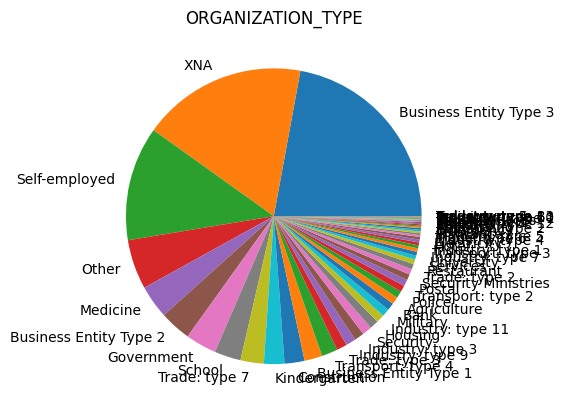

In [37]:
for c in cat_column:
    plt.figure()
    plt.title(c)
    plt.pie(data[c].value_counts(),labels=(dict(data[c].value_counts()).keys()))

<AxesSubplot:>

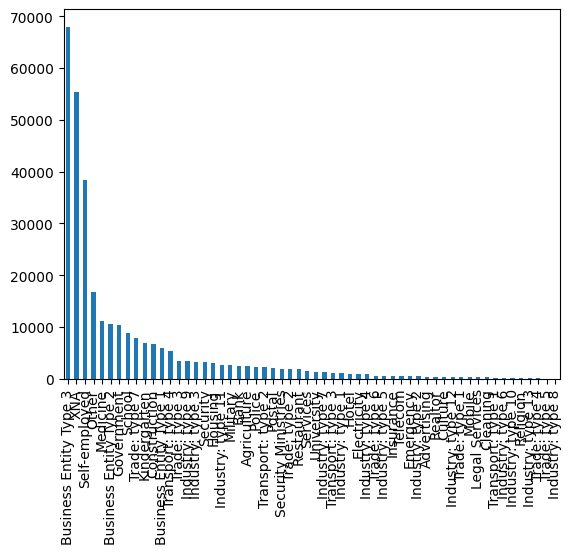

In [38]:
# Organization_type columns have most of categories, let's analys further
data["ORGANIZATION_TYPE"].value_counts().plot.bar()

In [39]:
data["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [40]:
# ORGANIZATION_TYPE shows that applicants apply for loan from Variety of ORGANIZATION_TYPE
# Business Entity Type 3    67992
# Business Entity Type 3 is where we get most of applications.

### EDA on Numerical variables (UniVariate analysis)

In [41]:
num_column
# let's see some of them

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

In [42]:
data["CNT_CHILDREN"].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [43]:
description[description["Row"]=="CNT_CHILDREN"].Description #Number of children the client has

6    Number of children the client has
Name: Description, dtype: object

<AxesSubplot:>

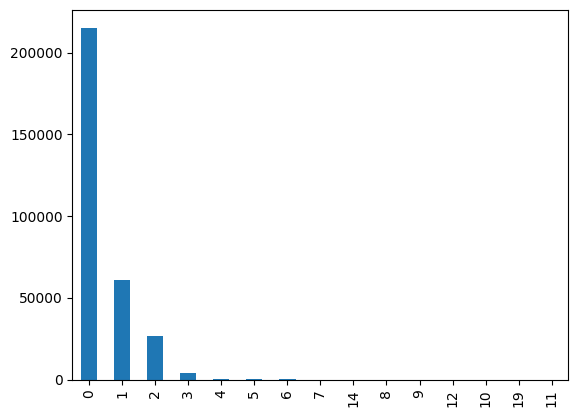

In [44]:
# here we can see that most of appliant does not have child(they might be unmarried or married but not have child)
data["CNT_CHILDREN"].value_counts().plot.bar()

<AxesSubplot:>

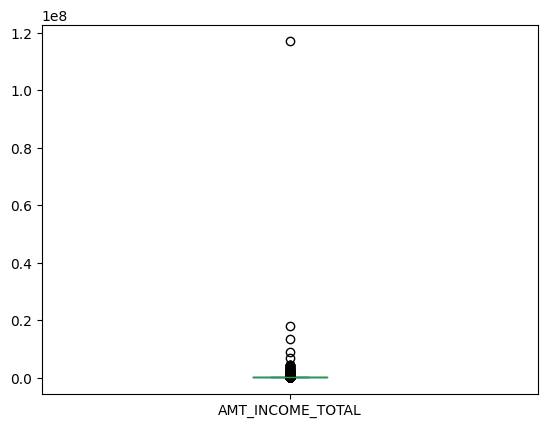

In [45]:
data["AMT_INCOME_TOTAL"].plot.box()

In [46]:
data["AMT_INCOME_TOTAL"].describe() # data is much skwed here we get few values which are very large

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [47]:
data["AMT_INCOME_TOTAL"].max()

117000000.0

In [48]:
data["AMT_INCOME_TOTAL"].min()

25650.0

<AxesSubplot:ylabel='Frequency'>

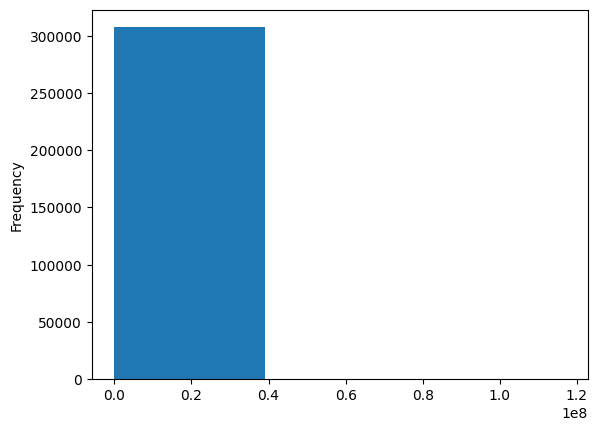

In [49]:
# mean and median almost nearby 
# here max 117000000.0 seems to be outlier (this might be noise in other case but here it is valid value of income)
data["AMT_INCOME_TOTAL"].plot.hist(bins=3) # most of values under .4*10^8

In [50]:
data["AMT_INCOME_TOTAL"].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.999,1])

0.000        25650.0
0.100        81000.0
0.200        99000.0
0.300       112500.0
0.400       135000.0
0.500       147150.0
0.600       162000.0
0.700       180000.0
0.800       225000.0
0.900       270000.0
0.999       900000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
# if we observe above even .999 percentile also 900000 and only some of values above 900000
# as summery we have most of applicant in range 1-10 lacs income

/var/folders/ws/rs6br8xd4hl9nywb05wx2lbnl734sg/T/ipykernel_2575/1120370096.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


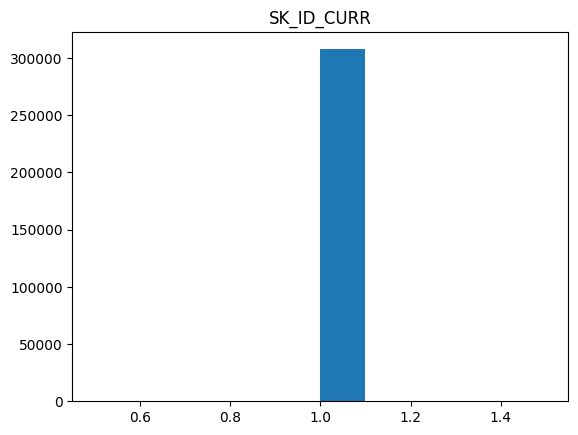

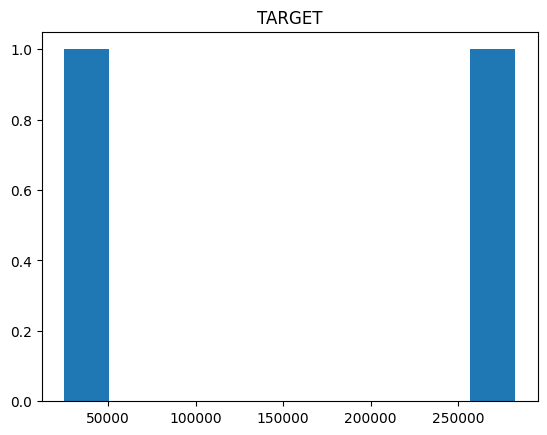

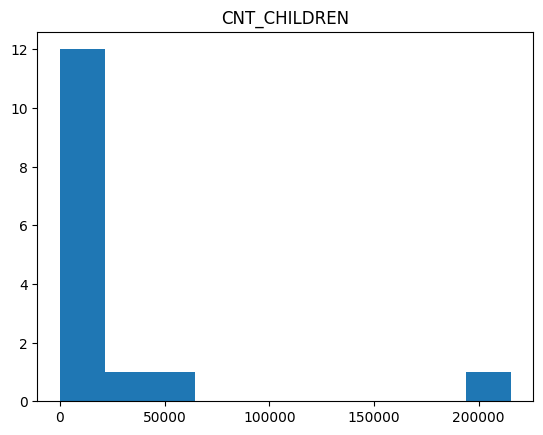

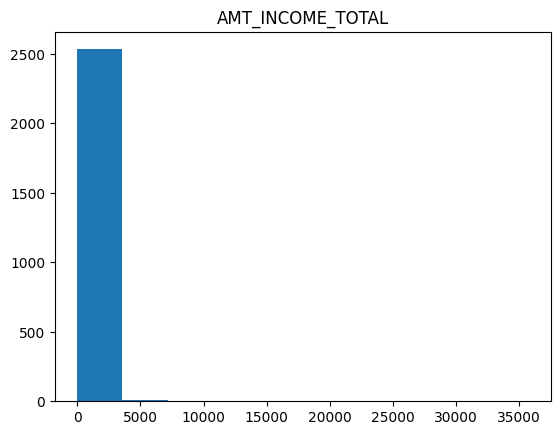

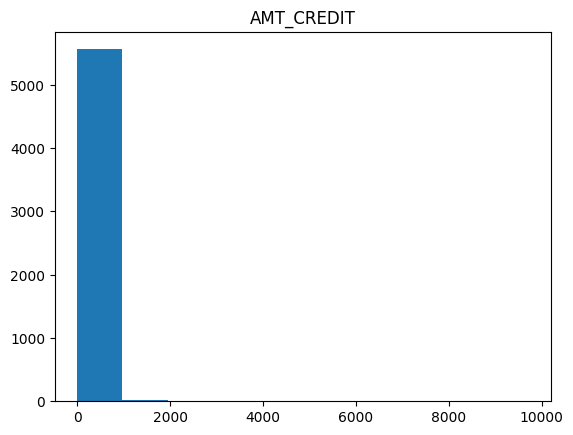

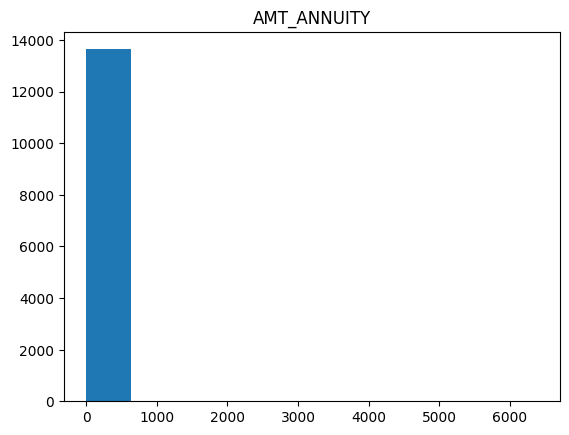

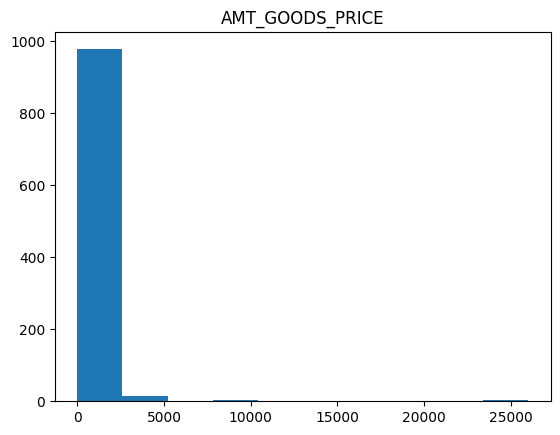

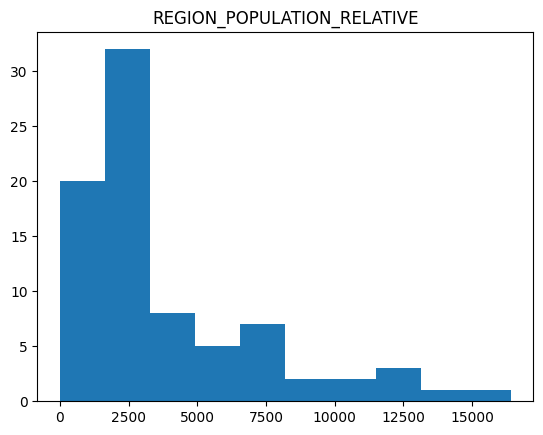

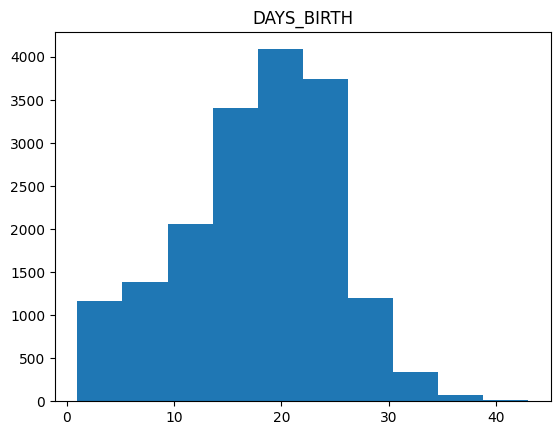

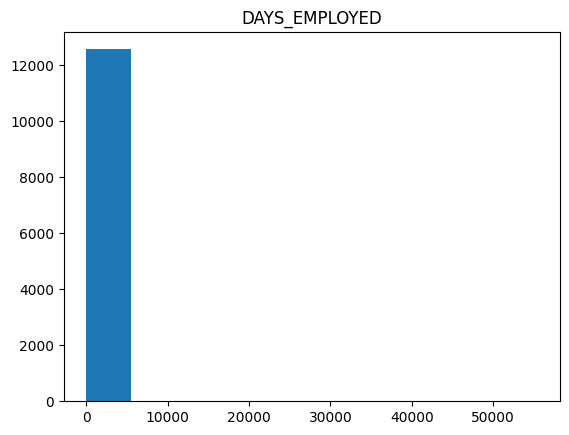

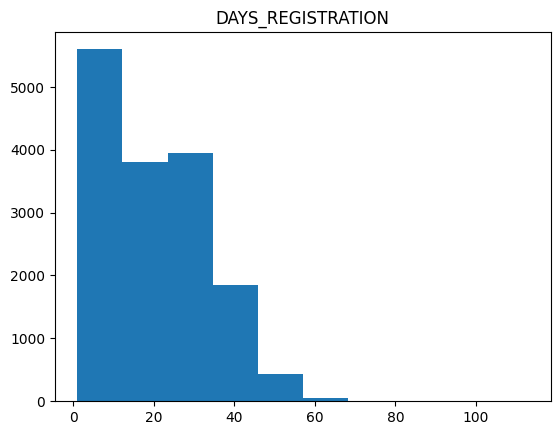

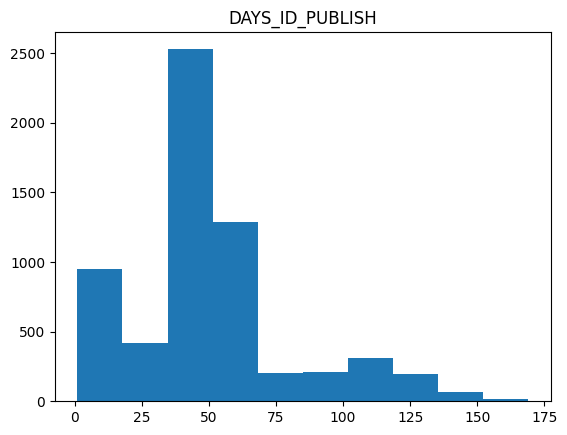

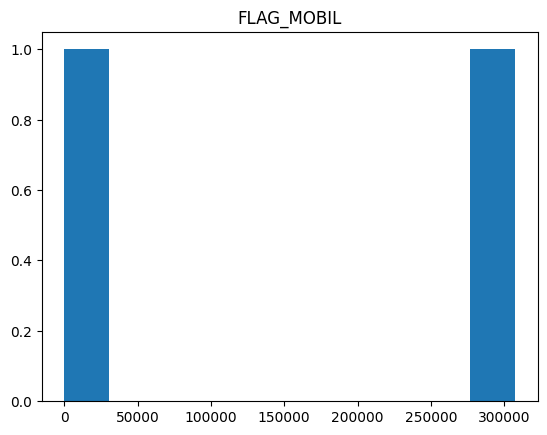

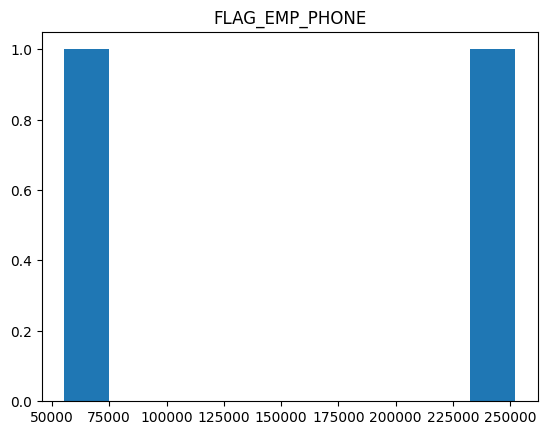

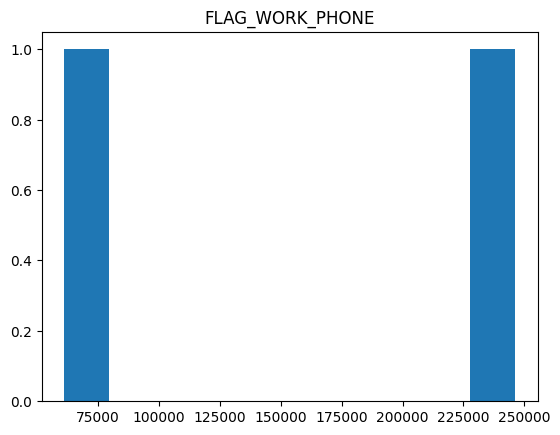

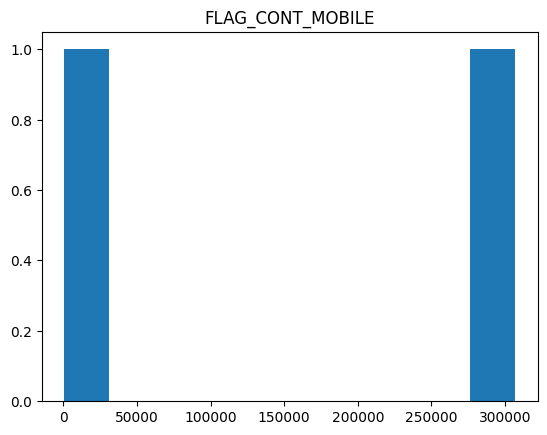

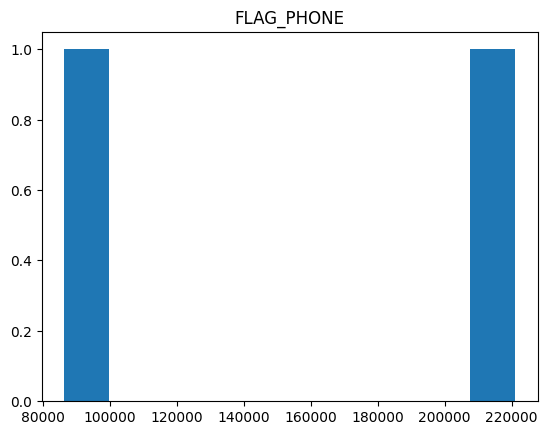

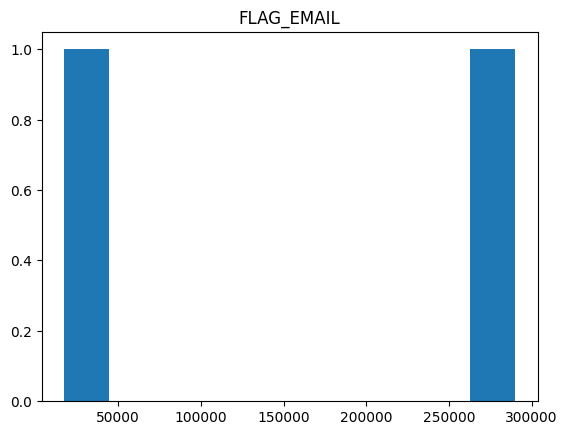

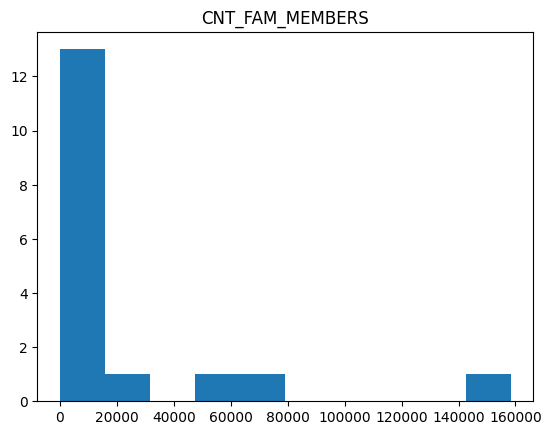

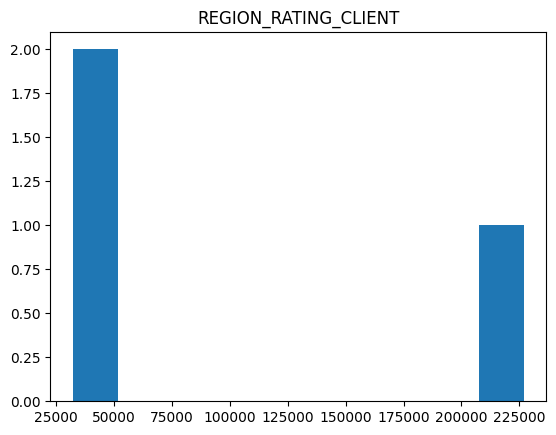

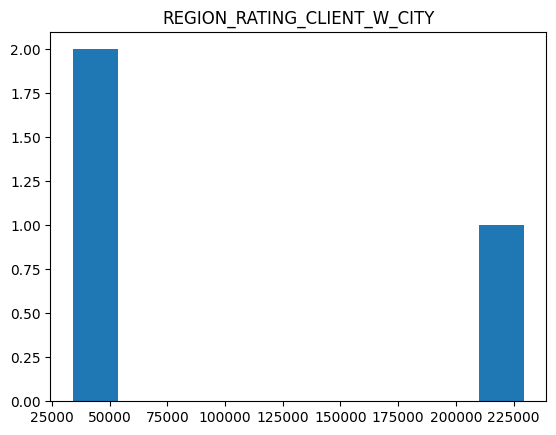

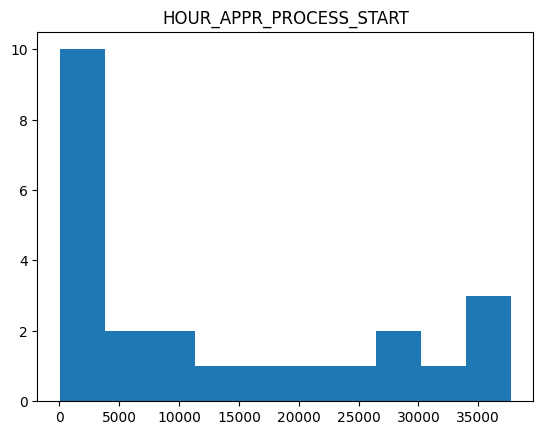

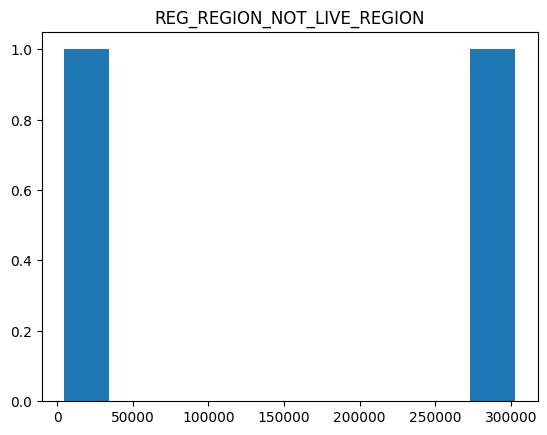

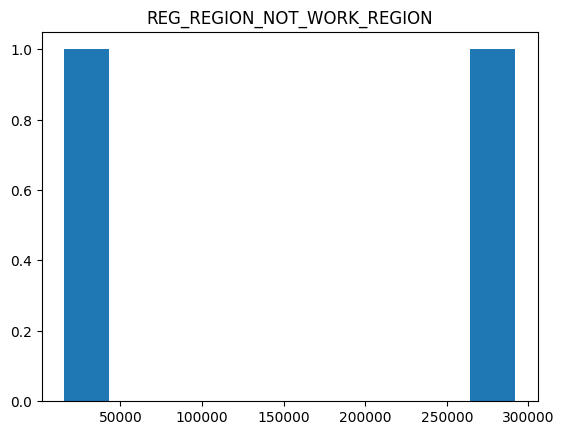

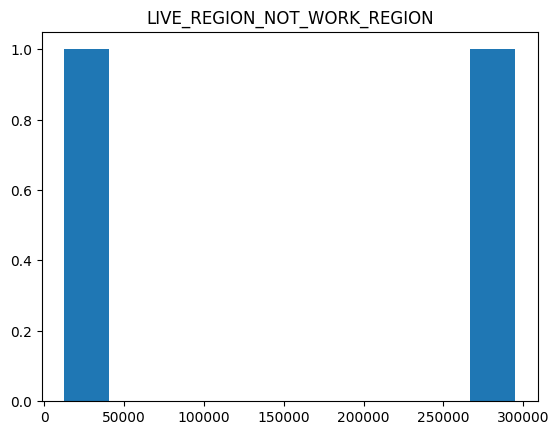

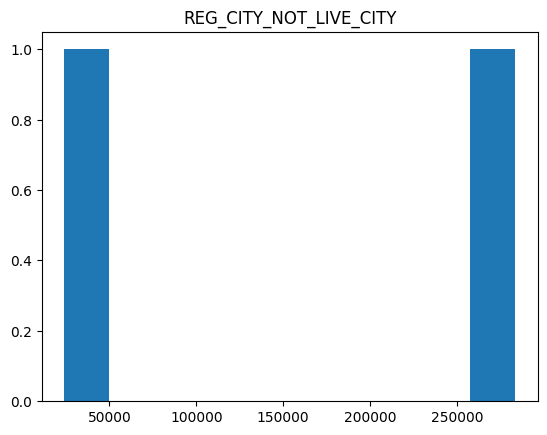

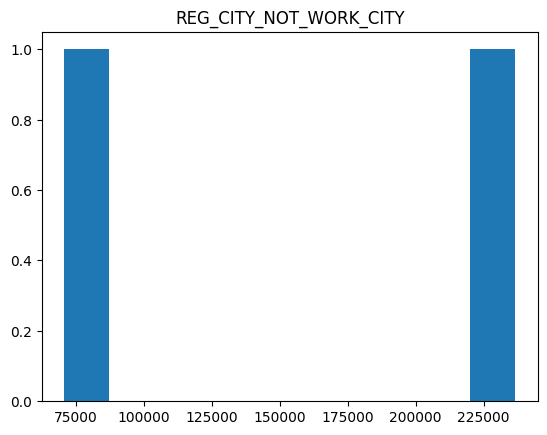

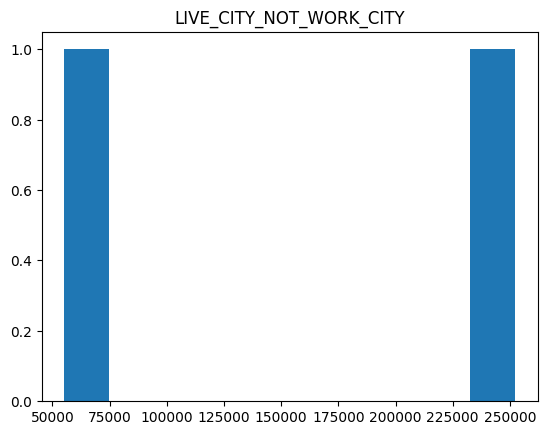

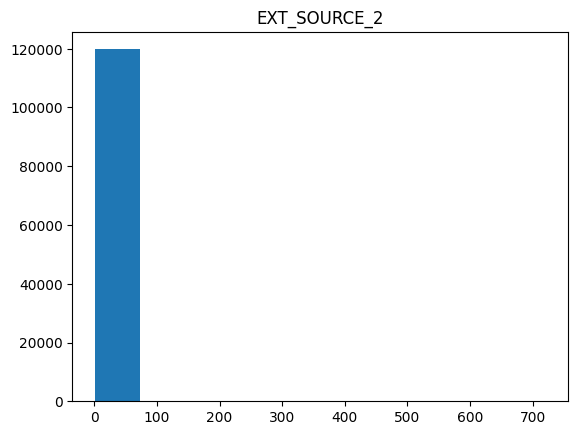

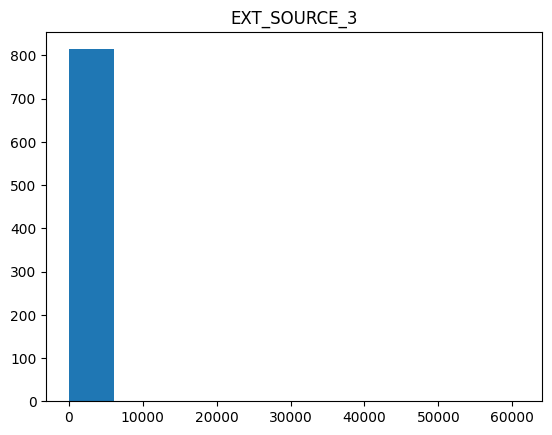

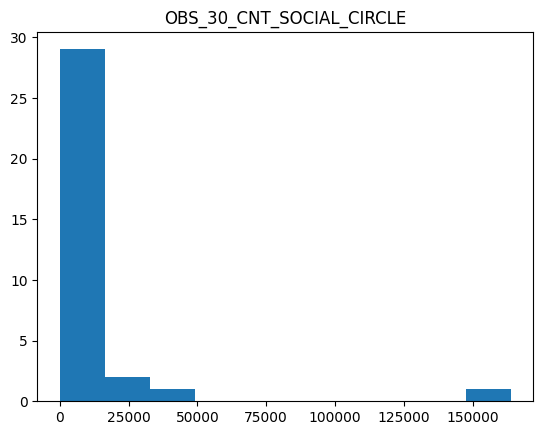

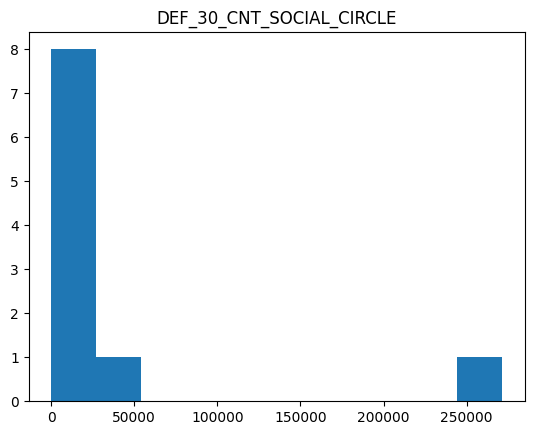

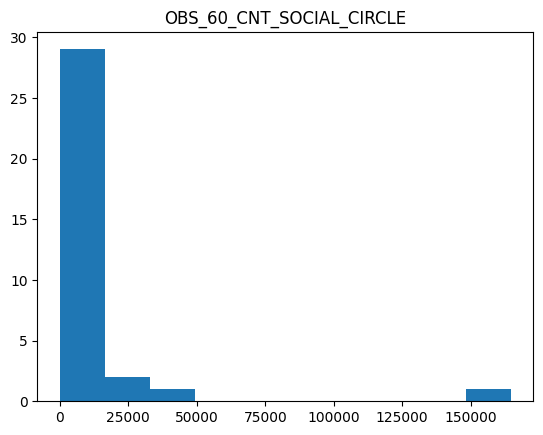

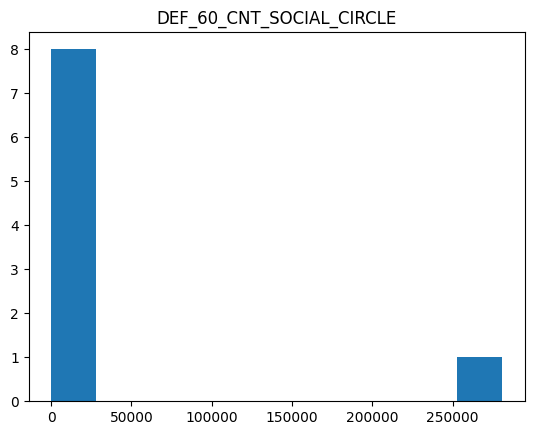

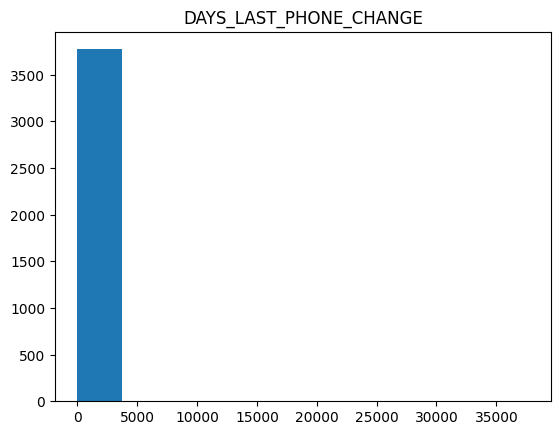

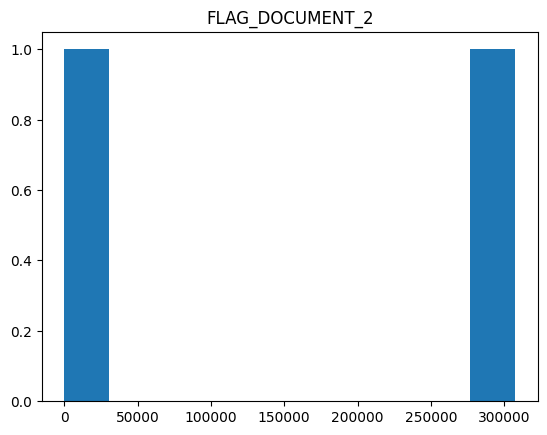

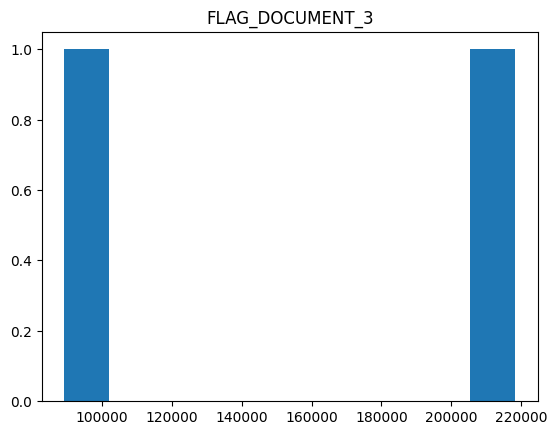

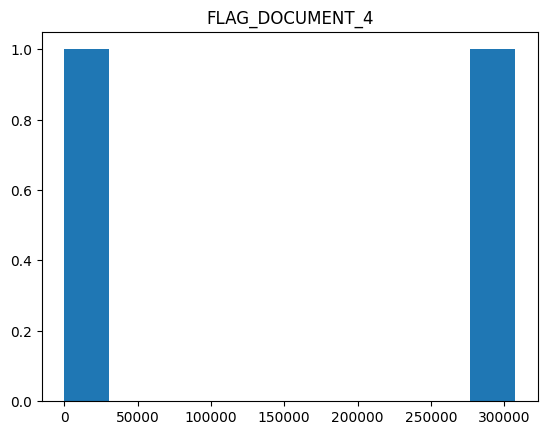

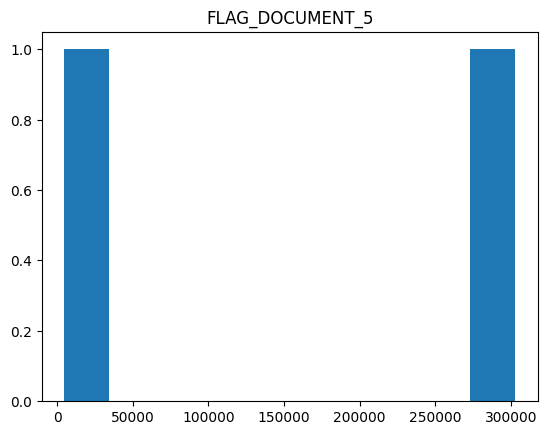

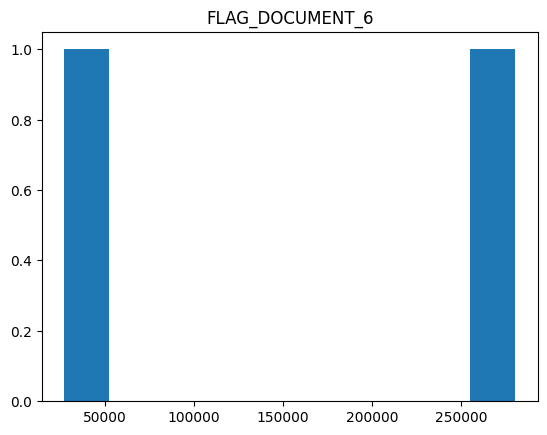

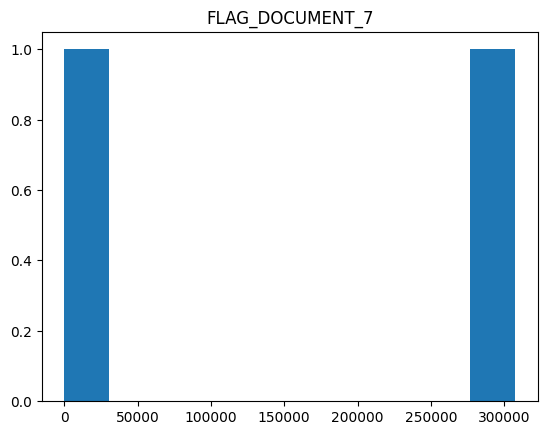

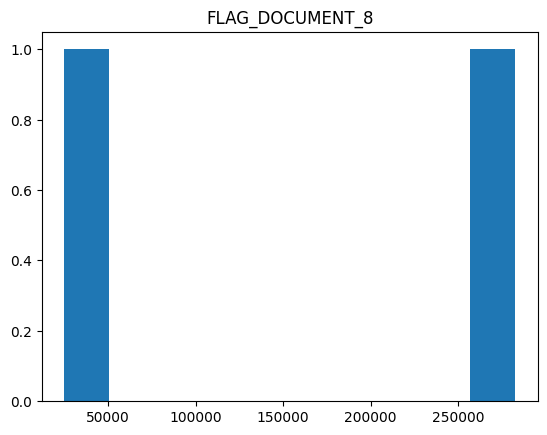

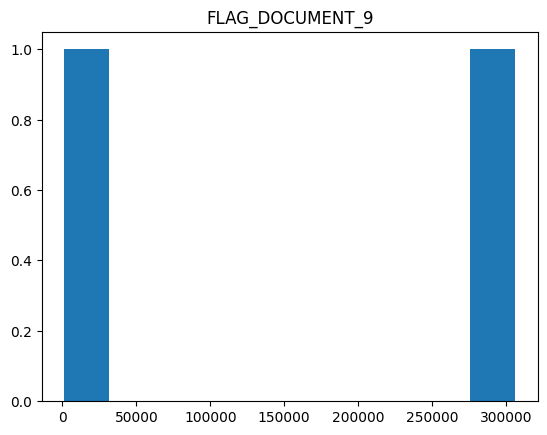

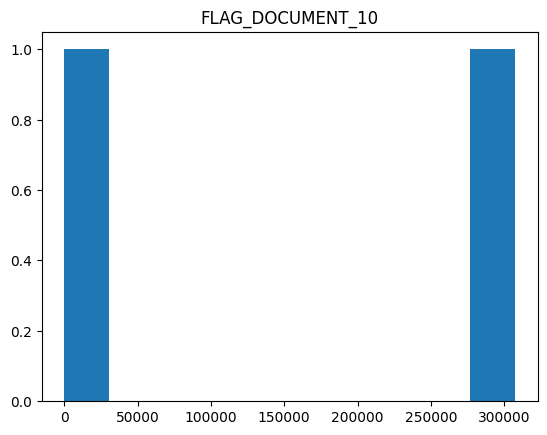

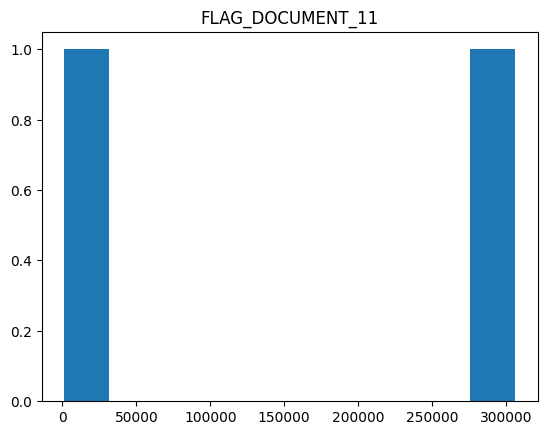

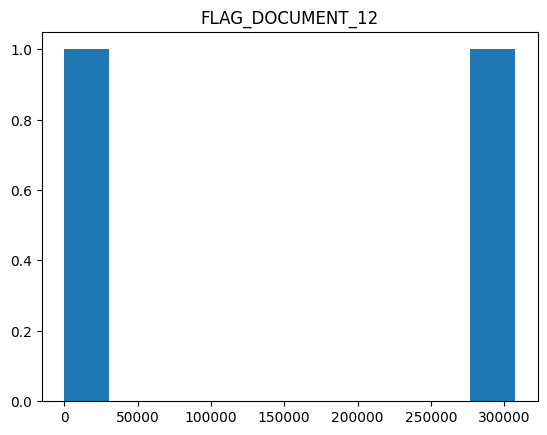

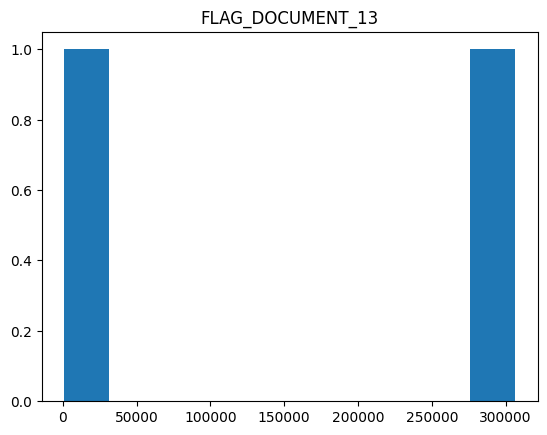

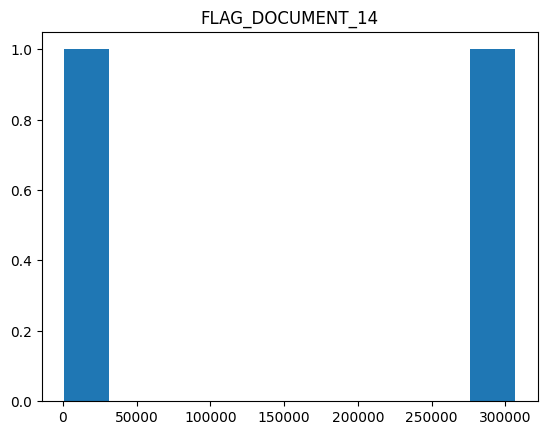

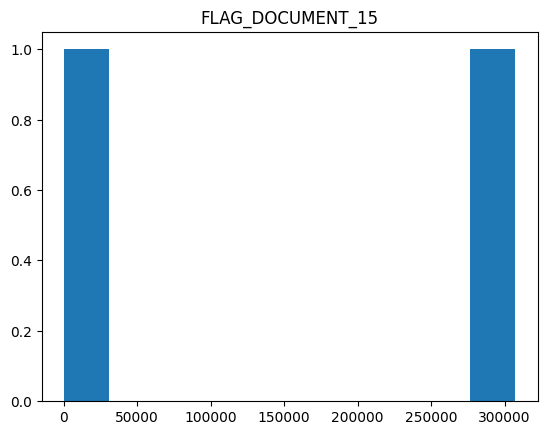

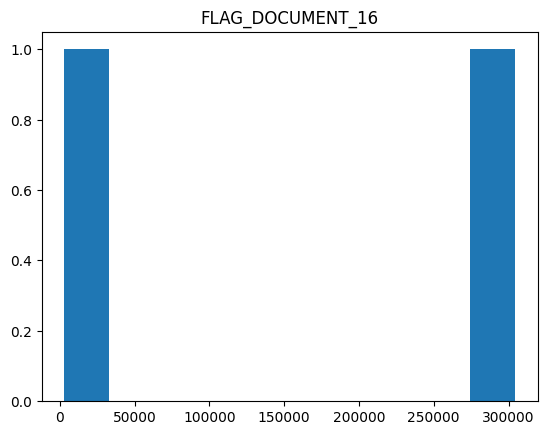

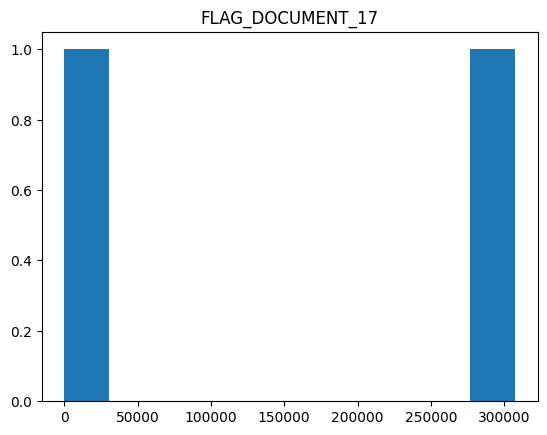

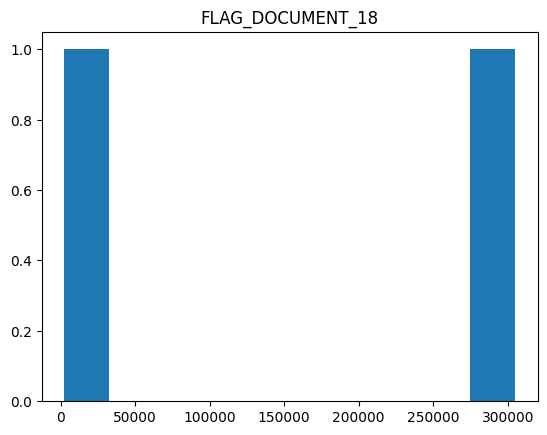

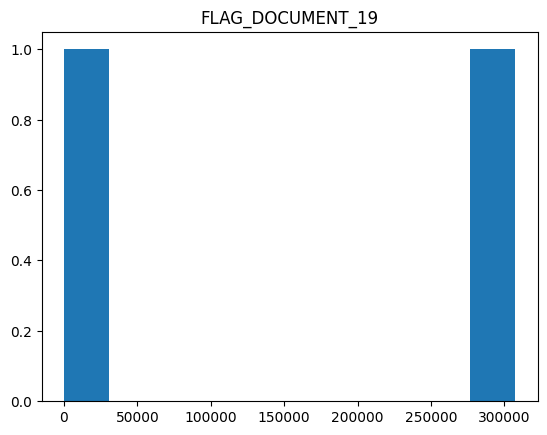

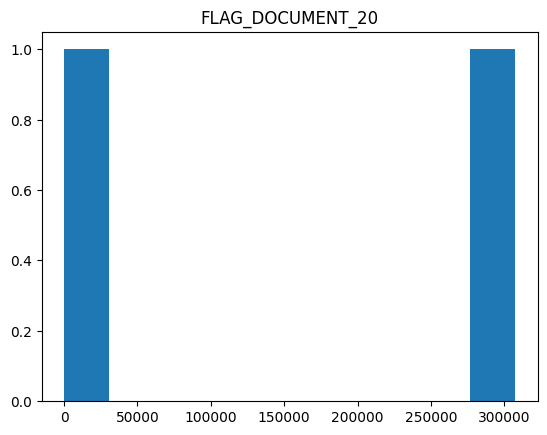

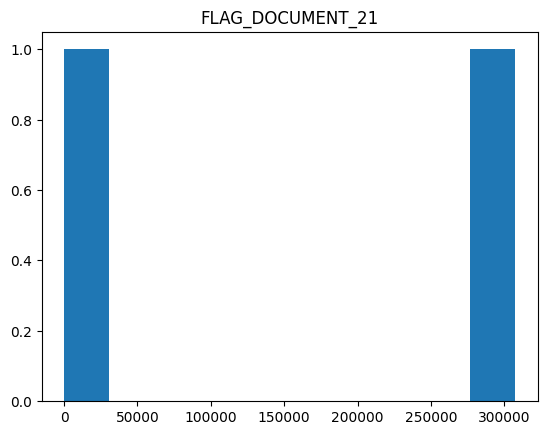

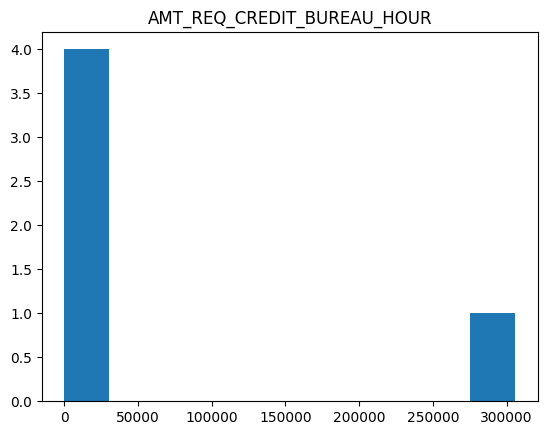

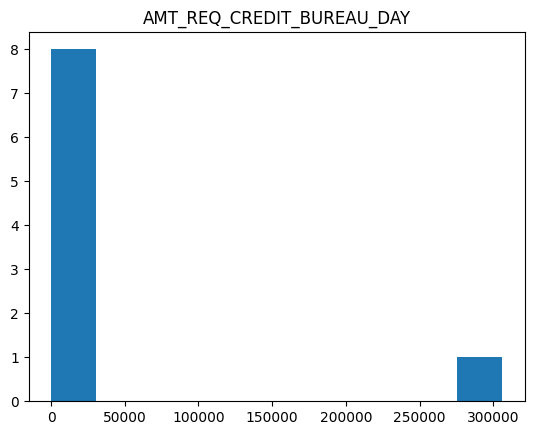

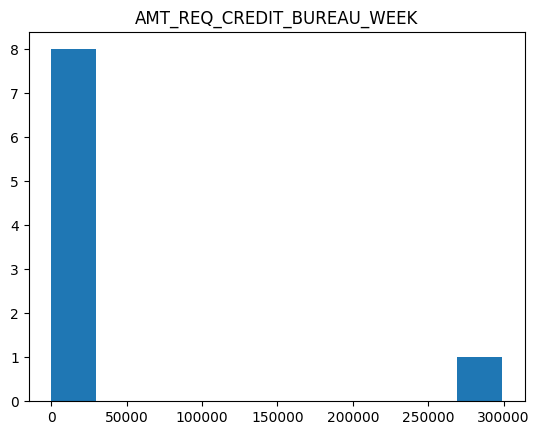

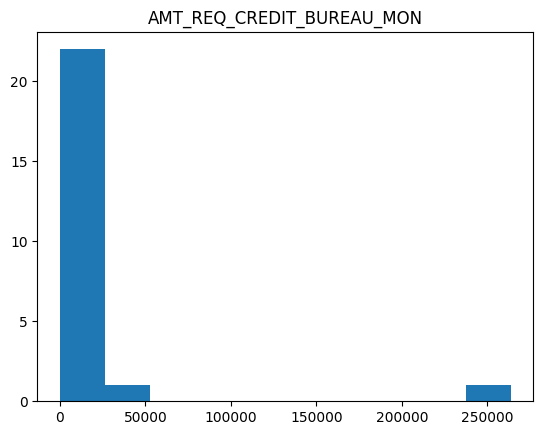

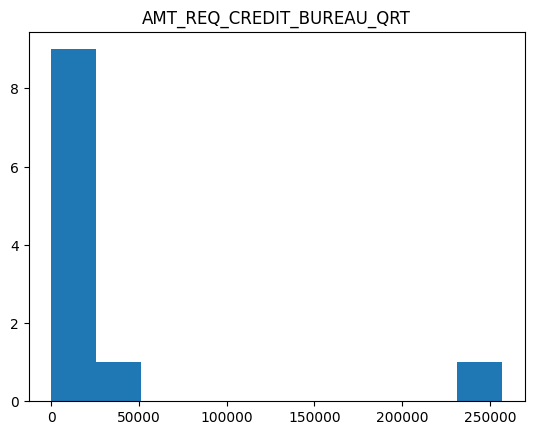

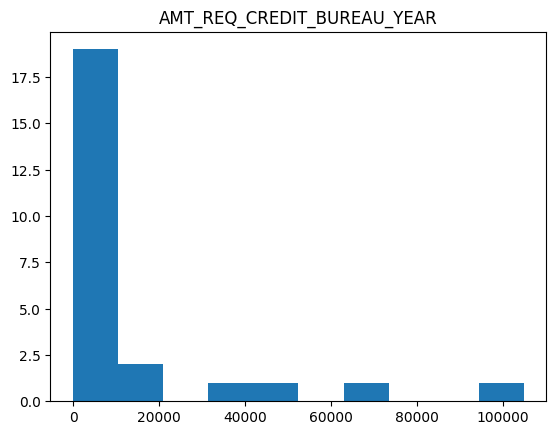

In [52]:
# plot for rest
for c in num_column:
    plt.figure()
    plt.title(c)
    plt.hist(data[c].value_counts())

### using univariate analysis does give information about independent variable but does not about Target, let's do Bivariate analysis with respect to Target ((Sign of)Defaulter or repayer) seperately

In [53]:
description[description["Row"]=="TARGET"].Description
#Target variable (1 - client with payment difficulties: he/she had late payment more than
#X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


1    Target variable (1 - client with payment diffi...
Name: Description, dtype: object

In [54]:
defaulter = data[data["TARGET"]==1]
repayer = data[data["TARGET"]==0]
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
##Let's analys Sign of Defaulter first
defaulter["CODE_GENDER"].value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

<AxesSubplot:>

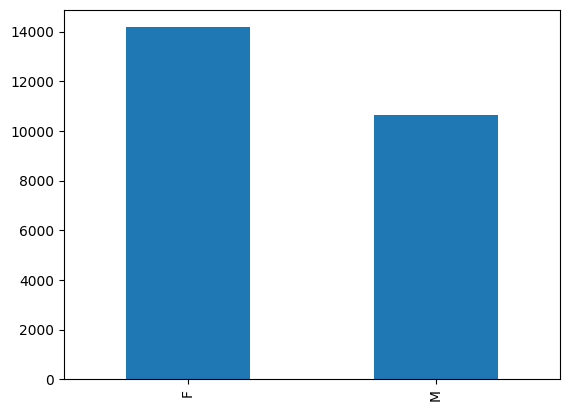

In [81]:
defaulter["CODE_GENDER"].value_counts().plot.bar() # it shows Female faces more difficulties to pay EMI's

### Let's verify does really female faces more difficulties to pay EMI's on total applicants 

In [79]:
data[data["CODE_GENDER"]=="F"].value_counts().sum()

128033

In [80]:
data[data["CODE_GENDER"]=="M"].value_counts().sum()

81061

In [73]:
# percentage of defaulter female applicant among all applicants.
(defaulter[defaulter["CODE_GENDER"]=="F"].value_counts().sum())/(data[data["CODE_GENDER"]=="F"].value_counts().sum())*100


7.728476252216225

In [75]:
# percentage of defaulter Male applicant among all applicants.
(defaulter[defaulter["CODE_GENDER"]=="M"].value_counts().sum())/(data[data["CODE_GENDER"]=="M"].value_counts().sum())*100


10.530341347873822

In [76]:
# percentage of Repayer female applicant among all applicants.
(repayer[repayer["CODE_GENDER"]=="F"].value_counts().sum())/(data[data["CODE_GENDER"]=="F"].value_counts().sum())*100


92.27152374778377

In [83]:
# percentage of repayer male applicant among all applicants.
(repayer[repayer["CODE_GENDER"]=="M"].value_counts().sum())/(data[data["CODE_GENDER"]=="M"].value_counts().sum())*100


89.46965865212617

## we see above that 7.7% of female of total are(suspecious) defaulter and 92.2% of total are may repay, While 10.5% of male are (suspecious) defaulter and 89.4% are only may repay

<AxesSubplot:>

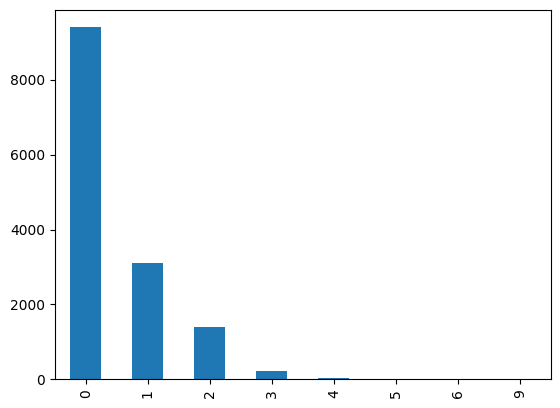

In [57]:
defaulter[defaulter["CODE_GENDER"]=="F"]["CNT_CHILDREN"].value_counts().plot.bar() 
# Here we see that female who have No children faces difficulties more.

<AxesSubplot:>

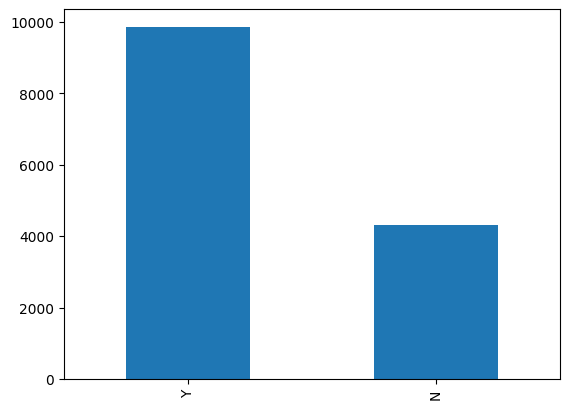

In [58]:
defaulter[defaulter["CODE_GENDER"]=="F"]["FLAG_OWN_REALTY"].value_counts().plot.bar() 
# depicts that if female own REALTY then they might have already EMI to pay there and faces difficulties to pay loan.

<AxesSubplot:>

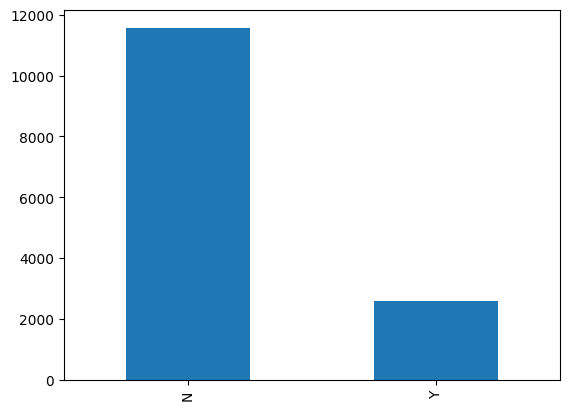

In [59]:
defaulter[defaulter["CODE_GENDER"]=="F"]["FLAG_OWN_CAR"].value_counts().plot.bar() 
# it show that who have not car are more vulnerable.

<AxesSubplot:>

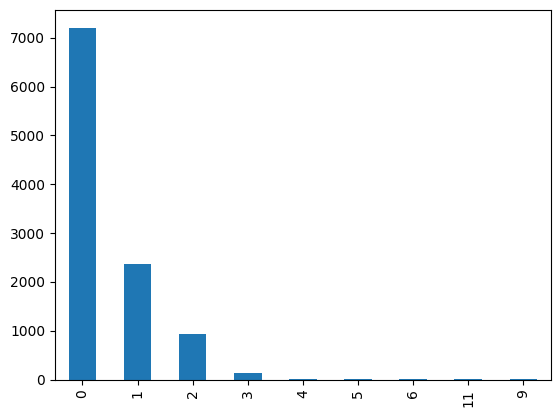

In [60]:
defaulter[defaulter["CODE_GENDER"]=="M"]["CNT_CHILDREN"].value_counts().plot.bar() 
# For male also same pattern are observed.

<AxesSubplot:ylabel='Frequency'>

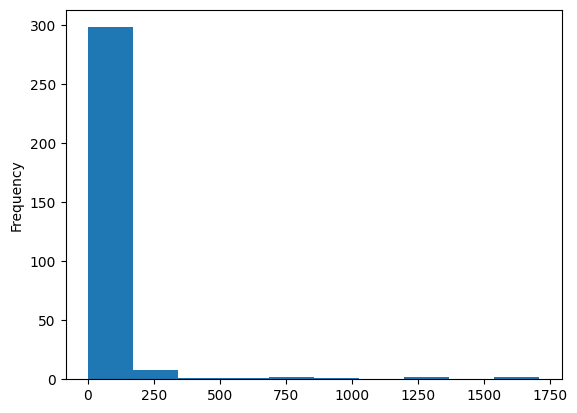

In [61]:
defaulter[defaulter["CODE_GENDER"]=="F"]["AMT_INCOME_TOTAL"].value_counts().plot.hist() 
# High income Female are less prone to pay loan emi.

<AxesSubplot:ylabel='Frequency'>

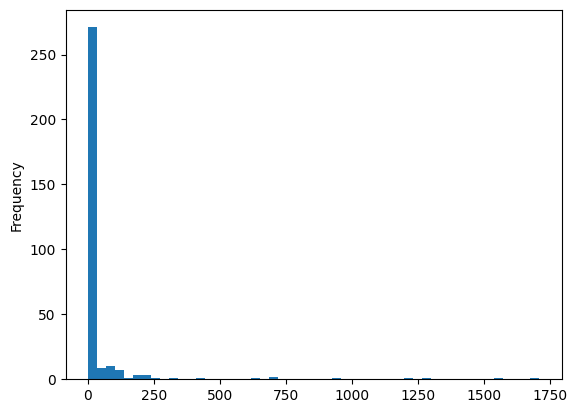

In [62]:
defaulter[defaulter["CODE_GENDER"]=="F"]["AMT_INCOME_TOTAL"].value_counts().plot.hist(bins=50) 
# High income Female are less prone to pay loan emi.

# Let's see which catagory of applicant are payer and should be credited loan.

In [63]:
repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [85]:
repayer["CODE_GENDER"].value_counts()
# more female repayer but not on total applicants.

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

<AxesSubplot:>

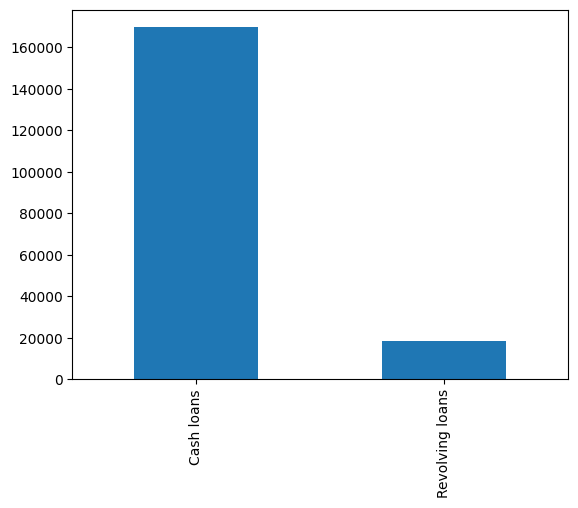

In [91]:
repayer[repayer["CODE_GENDER"]=="F"]["NAME_CONTRACT_TYPE"].value_counts().plot.bar()
# WE have more cash loans female applicants and can pay loan.

<AxesSubplot:>

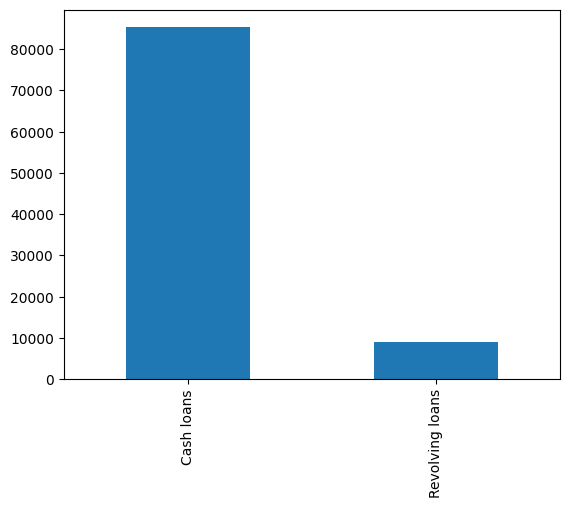

In [90]:
repayer[repayer["CODE_GENDER"]=="M"]["NAME_CONTRACT_TYPE"].value_counts().plot.bar()
# WE have more cash loans male applicants and can pay loan.

## let's merge previous applications with applications to see more insights

In [95]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
data.shape

(307511, 73)

In [129]:
prev_app.shape

(1670214, 37)

In [130]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [126]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [132]:
prev_app["FLAG_LAST_APPL_PER_CONTRACT"].value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [133]:
prev_app["CODE_REJECT_REASON"].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [134]:
prev_app["NAME_GOODS_CATEGORY"].value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [136]:
prev_app["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [122]:
merged_data = data.merge(how = 'inner', on = 'SK_ID_CURR',right = prev_app)
merged_data.head()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 109, dtype: int64

In [120]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 109 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(35), int64(46), object(28)
memory usage: 1.2+ GB


In [139]:
merged_data.shape

(1413701, 109)

<AxesSubplot:>

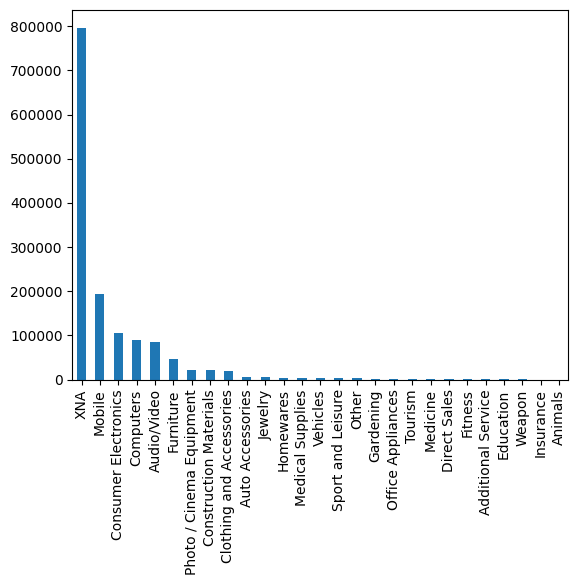

In [140]:
merged_data["NAME_GOODS_CATEGORY"].value_counts().plot.bar()
# shows that why need of loan

<AxesSubplot:>

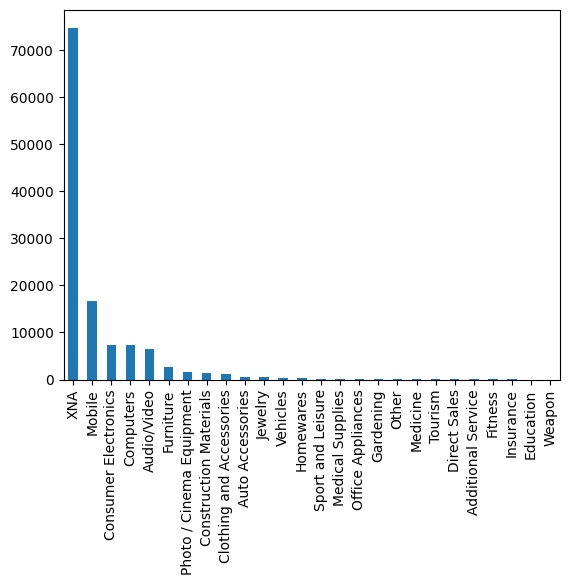

In [153]:
merged_data[(merged_data["TARGET"]==1)]["NAME_GOODS_CATEGORY"].value_counts().plot.bar()

<AxesSubplot:>

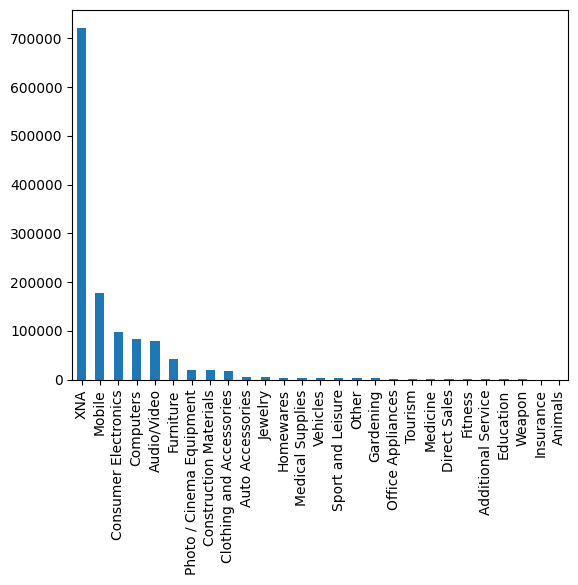

In [155]:
merged_data[(merged_data["TARGET"]==0)]["NAME_GOODS_CATEGORY"].value_counts().plot.bar()
# give only that in both case people take loan for Mobile, or CE, Computer